<a href="https://colab.research.google.com/github/NguyenHNhan/pyvista_3D/blob/main/Ontap3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt và khởi tạo đối tượng IT với Pixel Art để được kết quả bên dưới:

In [1]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

In [2]:
import pyvista
pyvista.global_theme.jupyter_backend = 'static'
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [3]:
import pyvista as pv
from pyvista.demos import logo

In [4]:
alien_str = """
    %   % % % % %
    %       %
    %       %
    %       %
"""

alien = []
for line in alien_str.splitlines()[1:]:
    if not line:
        continue
    if len(line) < 20:
        line += (20 - len(line)) * ' '
    alien.append([line[i : i + 2] == '% ' for i in range(0, len(line), 2)])

In [5]:
def draw_pixels(plotter, pixels, center, color):
    bounds = [
        center[0] - 1.0,
        center[0] + 1.0,
        center[1] - 1.0,
        center[1] + 1.0,
        -10.0,
        +10.0,
    ]
    for rows in pixels:
        for pixel in rows:
            if pixel:
                box = pv.Box(bounds=bounds)
                plotter.add_mesh(box, color=color)
            bounds[0] += 2.0
            bounds[1] += 2.0
        bounds[0] = center[0] - 1.0
        bounds[1] = center[0] + 1.0
        bounds[2] += -2.0
        bounds[3] += -2.0
    return plotter

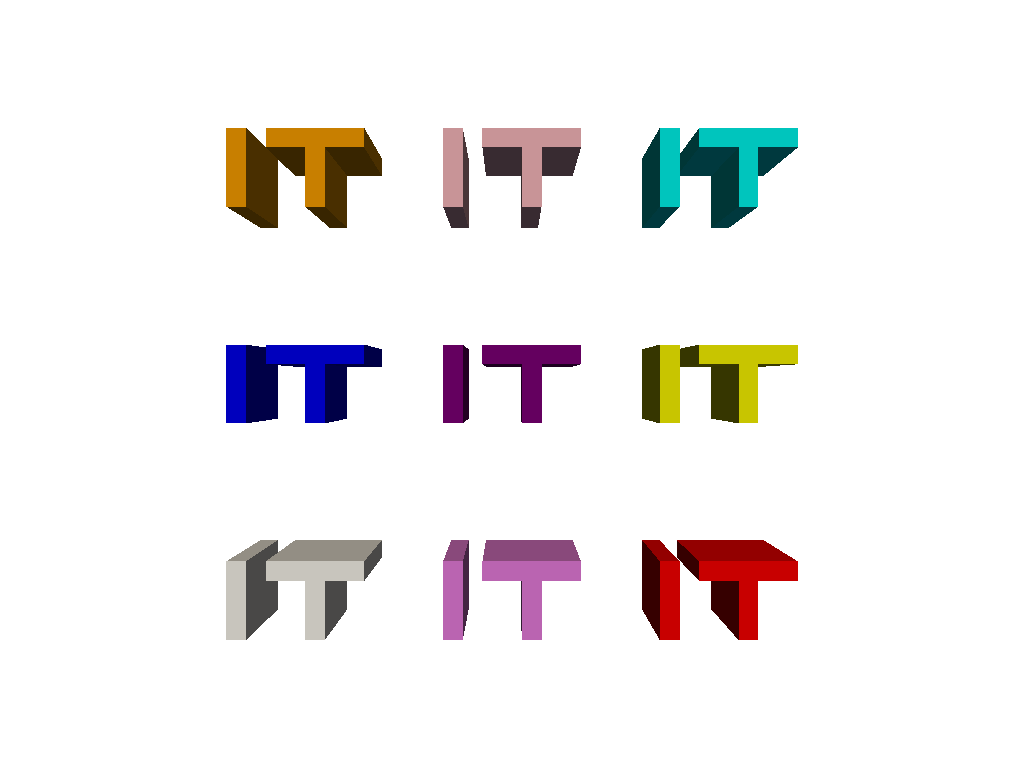

In [6]:
p = pv.Plotter()
p = draw_pixels(p, alien, [-22.0, 22.0], "orange")
p = draw_pixels(p, alien, [0.0, 22.0], "pink")
p = draw_pixels(p, alien, [22.0, 22.0], "cyan")
p = draw_pixels(p, alien, [-22.0, 0.0], "blue")
p = draw_pixels(p, alien, [0.0, 0.0], "purple")
p = draw_pixels(p, alien, [22.0, 0.0], "yellow")
p = draw_pixels(p, alien, [-22.0, -22.0], "white")
p = draw_pixels(p, alien, [0.0, -22.0], "violet")
p = draw_pixels(p, alien, [22.0, -22.0], "red")
p.show(cpos="xy")

Lưới phi cấu trúc

In [3]:
from pyvista import CellType
import numpy as np

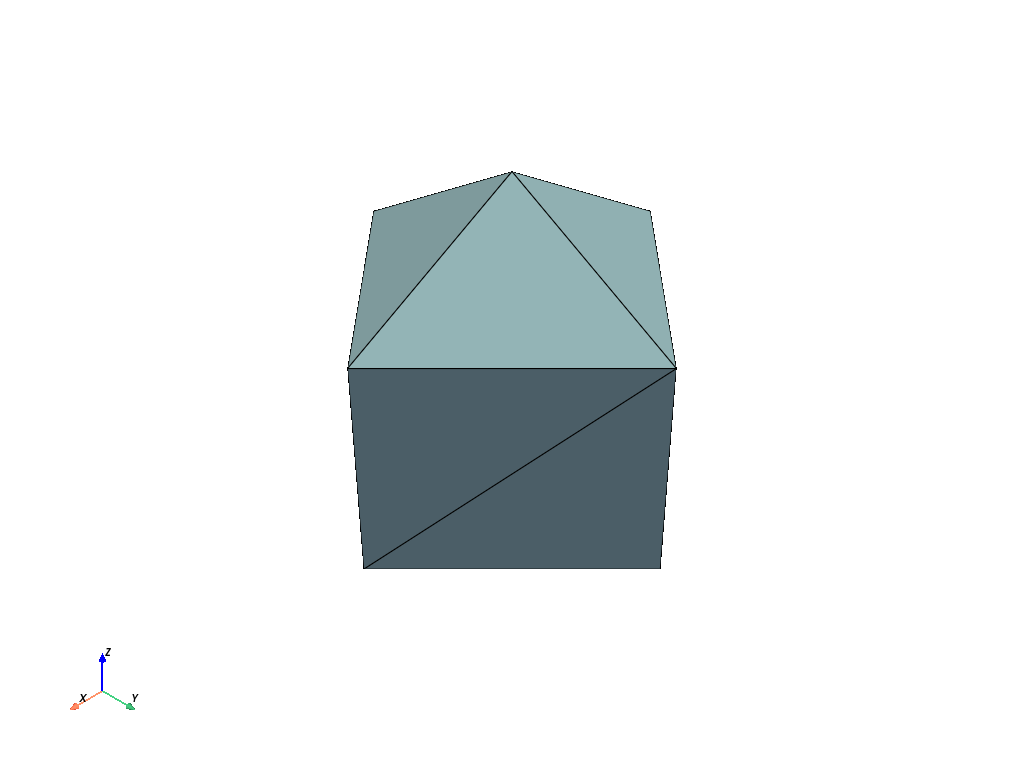

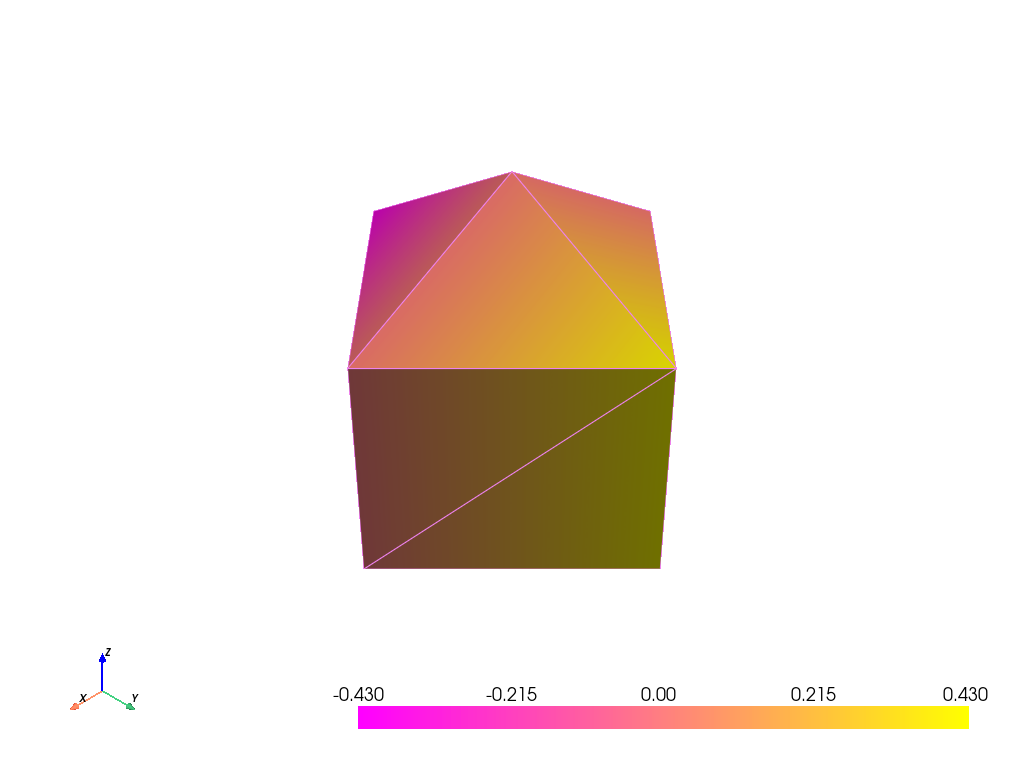

In [4]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

# Dữ liệu mẫu
cells = np.array([
    [4, 6, 5, 8, 7],
    [4, 7, 3, 8, 9],
    [4, 7, 3, 1, 5],
    [4, 9, 3, 1, 7],
    [4, 2, 6, 5, 8],
    [4, 2, 6, 0, 4],
    [4, 6, 2, 0, 8],
    [4, 5, 2, 8, 3],
    [4, 5, 3, 8, 7],
    [4, 2, 6, 4, 5],
])
celltypes = np.full(10, fill_value=pv.CellType.TETRA, dtype=np.uint8)
points = np.array([
    [-0.0, 0.0, -0.5],
    [0.0, 0.0, 0.5],
    [-0.43, 0.0, -0.25],
    [-0.43, 0.0, 0.25],
    [-0.0, 0.43, -0.25],
    [0.0, 0.43, 0.25],
    [0.43, 0.0, -0.25],
    [0.43, 0.0, 0.25],
    [0.0, -0.43, -0.25],
    [0.0, -0.43, 0.25],
])
grid = pv.UnstructuredGrid(cells, celltypes, points)

grid.plot(show_edges=True)

grid.plot(show_edges=True, scalars=points[:,1], cmap="spring", edge_color="violet")

# Hiển thị plot
plt.show()


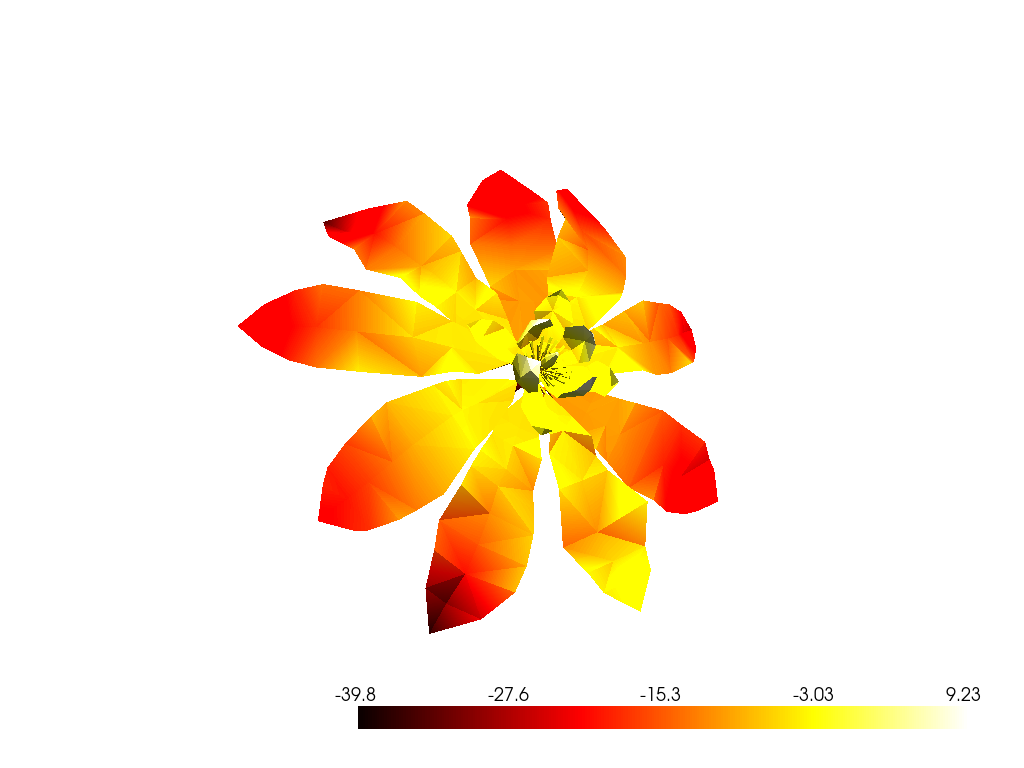

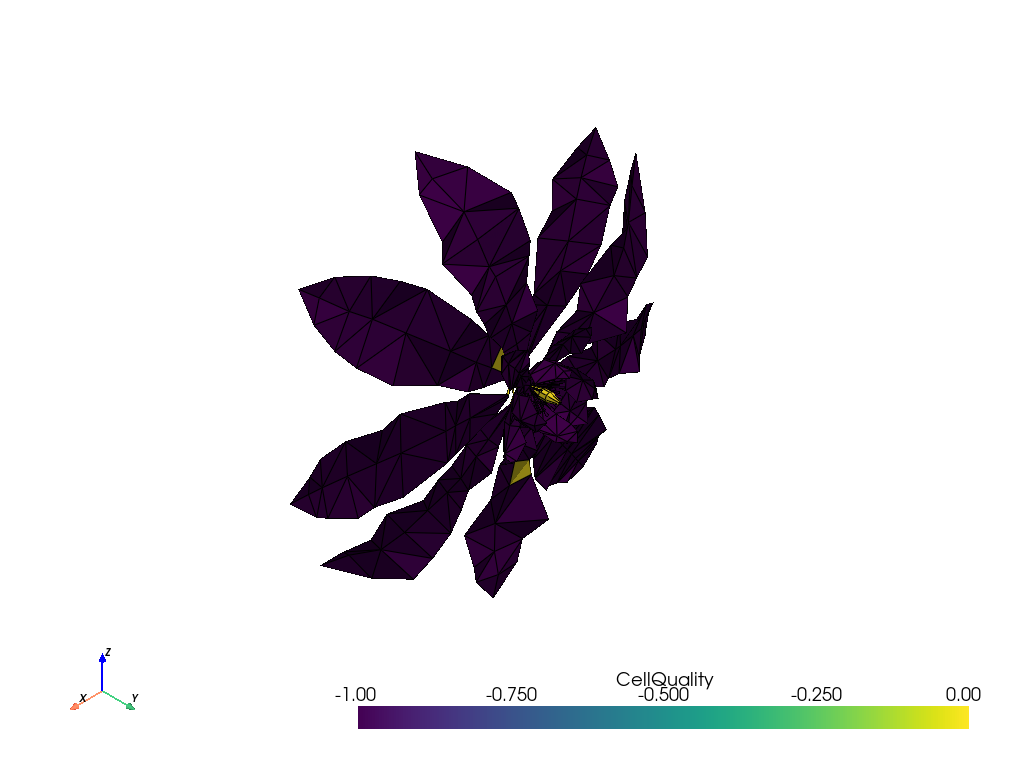

PolyData (0x7f50972399c0)
  N Cells:    1247
  N Points:   806
  N Strips:   0
  X Bounds:   -7.802e+01, 8.396e+01
  Y Bounds:   -3.981e+01, 9.232e+00
  Z Bounds:   -7.767e+01, 7.742e+01
  N Arrays:   5

In [ ]:
import pyvista as pv

mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

plotter = pv.Plotter()
plotter.add_mesh(mesh.rotate_x(50), scalars=mesh.points[:,1], cmap="hot")

light = pv.Light(position=(0, 1, 0), light_type='scene light')
light.set_direction_angle(100, -30)
plotter.add_light(light)

plotter.show()

cqual = mesh.compute_cell_quality('shear_and_size')
cqual.plot(show_edges=True)
cqual


# plotter.add_mesh(cqual, scalars='CellQuality', cmap='cool')

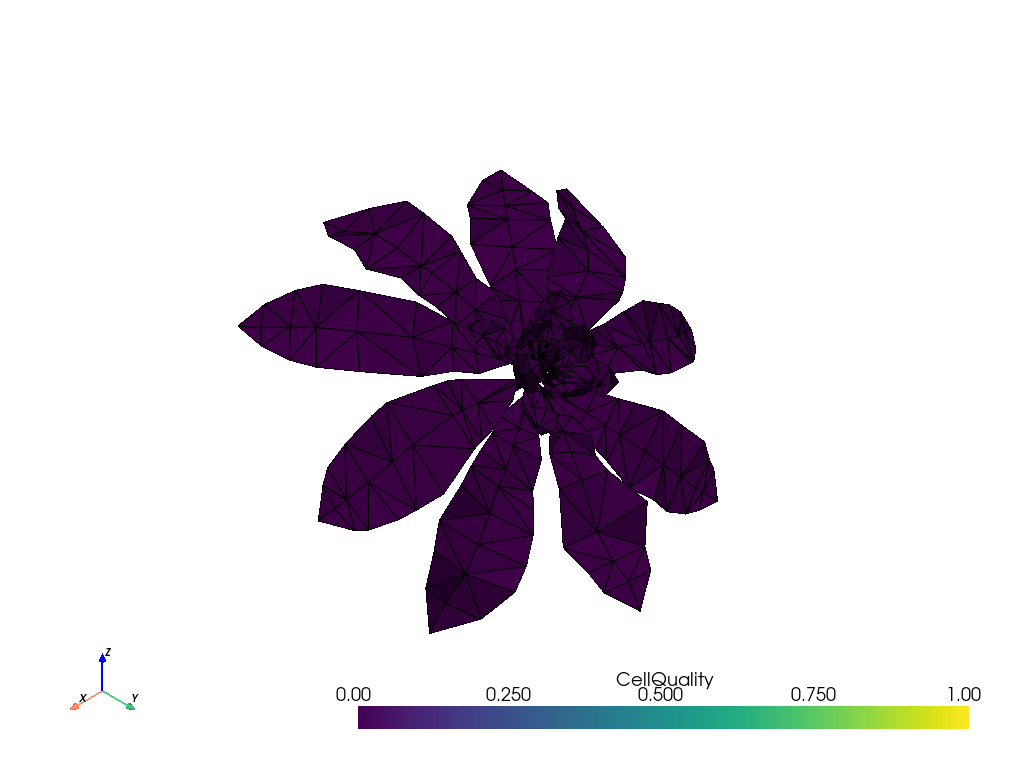

PolyData (0x7f5097238460)
  N Cells:    1247
  N Points:   806
  N Strips:   0
  X Bounds:   -7.802e+01, 8.396e+01
  Y Bounds:   -8.302e+01, 5.316e+01
  Z Bounds:   -6.348e+01, 3.145e+01
  N Arrays:   5

In [ ]:
import pyvista as pv

mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

# Xoay đối tượng mesh theo trục x với góc 50 độ
rotated_mesh = mesh.rotate_x(50)

# Tính toán chất lượng các ô cho đối tượng mesh xoay
cqual = rotated_mesh.compute_cell_quality('shape_and_size')

# Vẽ biểu đồ chất lượng các ô đã xoay
cqual.plot(show_edges=True)

cqual

Dựa vào thông tin trên, chúng ta có thể thấy mảng CellQuality có giá trị thấp nhất và cao nhất đều là 0.000e+00, cho thấy không có ô nào có chất lượng tốt hơn.

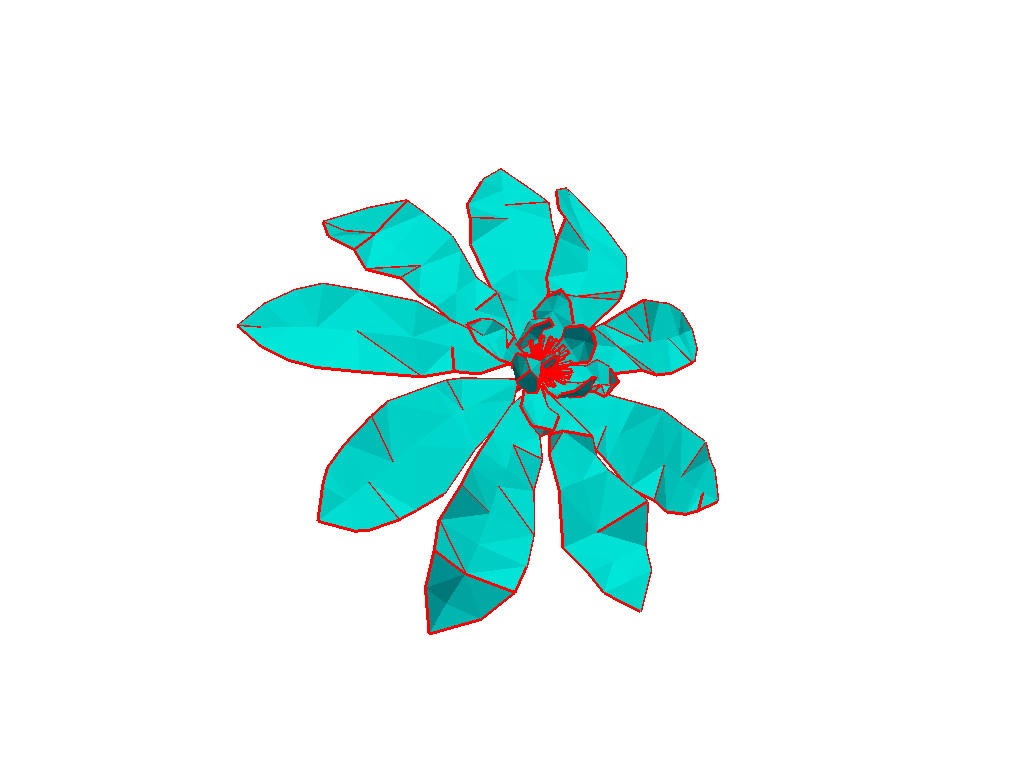

In [ ]:
import pyvista as pv

mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

edges = mesh.extract_feature_edges(30)

p = pv.Plotter()
p.add_mesh(mesh.rotate_x(50), color="cyan")

p.add_mesh(edges.rotate_x(50), color="red", line_width=3)

p.show()


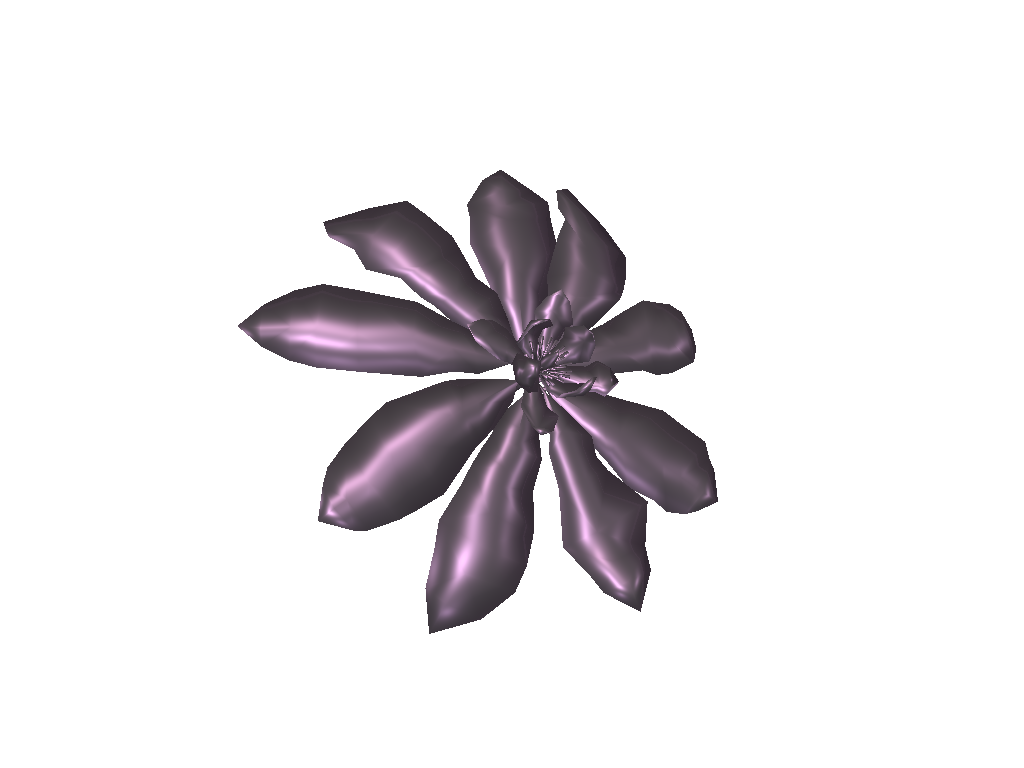

In [ ]:
import pyvista as pv

# Tạo đối tượng Plotter
p = pv.Plotter()

# Đọc đối tượng mesh
mesh = pv.read("/content/drive/MyDrive/Object3D/magnolia.obj")

# Cấu hình ánh sáng của camera
camera_light = pv.Light(light_type='camera light')
p.add_light(camera_light)

p.add_mesh(mesh.rotate_x(50), color='violet', pbr=True, metallic=0.7, roughness=0.5, diffuse=1)

p.show()
# Cấu hình vị trí camera
# cpos = [(-313.40, 66.09, 1000.61), (0.0, 0.0, 0.0), (0.018, 0.99, -0.06)]

# Hiển thị đối tượng
# p.show(cpos=cpos)


# Phần 1: Các loại ánh sáng

## 1.1 Đèn pha(headlight)

In [ ]:
import pyvista as pv
from pyvista import examples

mesh = examples.download_bunny()
mesh.rotate_x(90, inplace=True)
mesh.rotate_z(180, inplace=True)

plotter = pv.Plotter(lighting='none')
plotter.add_mesh(mesh, color='tan', smooth_shading=True)
light = pv.Light(light_type='headlight')
# these don't do anything for a headlight:
light.position = (1, 2, 3)
light.focal_point = (4, 5, 6)
plotter.add_light(light)
plotter.show()

## 1.2 Đèn máy ảnh (camera light)


In [ ]:
plotter = pv.Plotter(lighting='none')
plotter.add_mesh(mesh, color='tan', smooth_shading=True)
# a light that always shines from the right of the camera
light = pv.Light(position=(1, 0, 0), light_type='camera light')
plotter.add_light(light)
plotter.show()

## 1.3 Đèn cảnh(scene light)

In [ ]:
plotter = pv.Plotter(lighting='none')
plotter.add_mesh(mesh, color='tan', smooth_shading=True)
# a light that always shines on the left side of the bunny
light = pv.Light(position=(0, 1, 0), light_type='scene light')
plotter.add_light(light)
plotter.show()

# Phần 2: Hệ thống chiếu sáng máy vẽ

In [ ]:
import pyvista as pv
from pyvista import examples

## 2.1 Bộ đèn

In [ ]:
# default: light kit
plotter = pv.Plotter()
light_types = [light.light_type for light in plotter.renderer.lights]
# Remove from plotters so output is not produced in docs
pv.plotting._ALL_PLOTTERS.clear()
light_types

In [ ]:
mesh = examples.download_st_helens().warp_by_scalar()
plotter = pv.Plotter()
plotter.add_mesh(mesh, color='white')
plotter.show()

## 2.2 Chiếu sáng ba đèn

In [ ]:
plotter = pv.Plotter(lighting='three lights')
plotter.add_mesh(mesh, color='white')
plotter.show()

In [ ]:
plotter = pv.Plotter(lighting='three lights')
light_types = [light.light_type for light in plotter.renderer.lights]
# Remove from plotters so output is not produced in docs
pv.plotting._ALL_PLOTTERS.clear()
light_types

## 2.3 Ánh sáng tùy chỉnh

In [ ]:
plotter = pv.Plotter(lighting='none', window_size=(1000, 1000))
plotter.add_mesh(mesh, color='white', smooth_shading=True)
light = pv.Light()
light.set_direction_angle(30, -20)
plotter.add_light(light)
plotter.show()

## 2.4 Ánh sáng tùy chỉnh với shadows

In [ ]:
plotter = pv.Plotter(lighting='none', window_size=(1000, 1000))
plotter.add_mesh(mesh, color='white', smooth_shading=True)
light = pv.Light()
light.set_direction_angle(20, -20)
plotter.add_light(light)
plotter.enable_shadows()
plotter.show()

Kết xuát lưới

In [6]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61405 sha256=12a8aa42520e021ad556bce955f8961083d04f9547608c666c23df2365ec922c
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31531 sha256=d49d22e19109a0d36e205bfd0f45fc8e9f5d7b684d683eddaee2cce23b0c286e
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu118_pyt201/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 109.4 MB/s eta 0:00:00


In [7]:
import os
import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from pytorch3d.utils import ico_sphere
from pytorch3d.io import load_objs_as_meshes, load_obj
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    SoftSilhouetteShader,
    MeshRasterizer,
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)
import sys
import os
sys.path.append(os.path.abspath(''))

In [10]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

--2023-07-06 14:53:20--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py’

plot_image_grid.py  100%[===================>]   1.57K  --.-KB/s    in 0s      

2023-07-06 14:53:20 (30.4 MB/s) - ‘plot_image_grid.py’ saved [1608/1608]



In [11]:
!mkdir -p data/cow_mesh
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow_texture.png

--2023-07-06 14:53:30--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.15, 52.84.251.114, 52.84.251.106, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330659 (323K) [text/plain]
Saving to: ‘data/cow_mesh/cow.obj’

cow.obj             100%[===================>] 322.91K  --.-KB/s    in 0.007s  

2023-07-06 14:53:30 (46.2 MB/s) - ‘data/cow_mesh/cow.obj’ saved [330659/330659]

--2023-07-06 14:53:30--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.15, 52.84.251.114, 52.84.251.106, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155 [text/plain]
Saving to: ‘data/cow_mesh/cow.mtl’

cow.mtl             100%[=====

In [12]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
DATA_DIR = "/content/data/cow_mesh"
obj_filename = os.path.join(DATA_DIR, "/content/data/cow_mesh/cow.obj")

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

verts = mesh.verts_packed()
N = verts.shape[0]
center = verts.mean(0)
scale = max((verts - center).abs().max(0)[0])
mesh.offset_verts_(-center)
mesh.scale_verts_((1.0 / float(scale)));

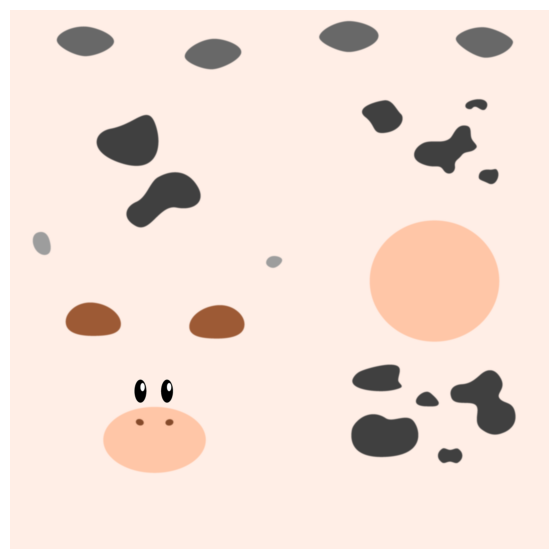

In [14]:
plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");

In [15]:
import os
import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from pytorch3d.utils import ico_sphere
from pytorch3d.io import load_objs_as_meshes, load_obj
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    SoftSilhouetteShader,
    MeshRasterizer,
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)
import sys
import os
sys.path.append(os.path.abspath(''))

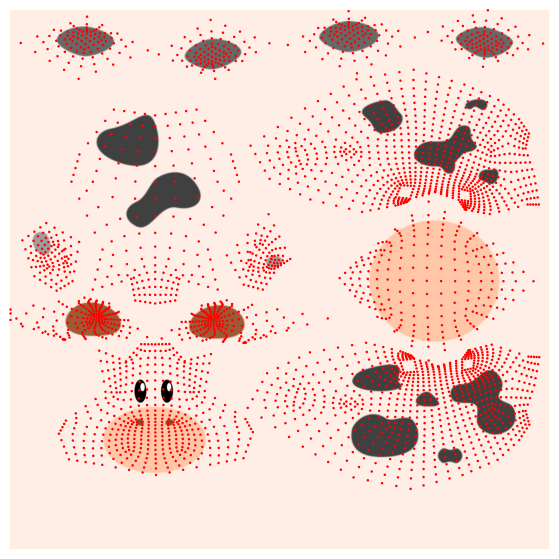

In [16]:
plt.figure(figsize=(7,7))
texturesuv_image_matplotlib(mesh.textures, subsample=None)
plt.axis("off");

In [17]:
# the number of different viewpoints from which we want to render the mesh.
num_views = 20

# Get a batch of viewing angles.
elev = torch.linspace(0, 360, num_views)
azim = torch.linspace(-180, 180, num_views)

# Place a point light in front of the object. As mentioned above, the front of
# the cow is facing the -z direction.
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

# Initialize an OpenGL perspective camera that represents a batch of different
# viewing angles. All the cameras helper methods support mixed type inputs and
# broadcasting. So we can view the camera from the a distance of dist=2.7, and
# then specify elevation and azimuth angles for each viewpoint as tensors.
R, T = look_at_view_transform(dist=2.7, elev=elev, azim=azim)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# We arbitrarily choose one particular view that will be used to visualize
# results
camera = FoVPerspectiveCameras(device=device, R=R[None, 1, ...],
                                  T=T[None, 1, ...])

# Define the settings for rasterization and shading. Here we set the output
# image to be of size 128X128. As we are rendering images for visualization
# purposes only we will set faces_per_pixel=1 and blur_radius=0.0. Refer to
# rasterize_meshes.py for explanations of these parameters.  We also leave
# bin_size and max_faces_per_bin to their default values of None, which sets
# their values using heuristics and ensures that the faster coarse-to-fine
# rasterization method is used.  Refer to docs/notes/renderer.md for an
# explanation of the difference between naive and coarse-to-fine rasterization.
raster_settings = RasterizationSettings(
    image_size=128,
    blur_radius=0.0,
    faces_per_pixel=1,
)

# Create a Phong renderer by composing a rasterizer and a shader. The textured
# Phong shader will interpolate the texture uv coordinates for each vertex,
# sample from a texture image and apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device,
        cameras=camera,
        lights=lights
    )
)

# Create a batch of meshes by repeating the cow mesh and associated textures.
# Meshes has a useful `extend` method which allows us do this very easily.
# This also extends the textures.
meshes = mesh.extend(num_views)

# Render the cow mesh from each viewing angle
target_images = renderer(meshes, cameras=cameras, lights=lights)

# Our multi-view cow dataset will be represented by these 2 lists of tensors,
# each of length num_views.
target_rgb = [target_images[i, ..., :3] for i in range(num_views)]
target_cameras = [FoVPerspectiveCameras(device=device, R=R[None, i, ...],
                                           T=T[None, i, ...]) for i in range(num_views)]

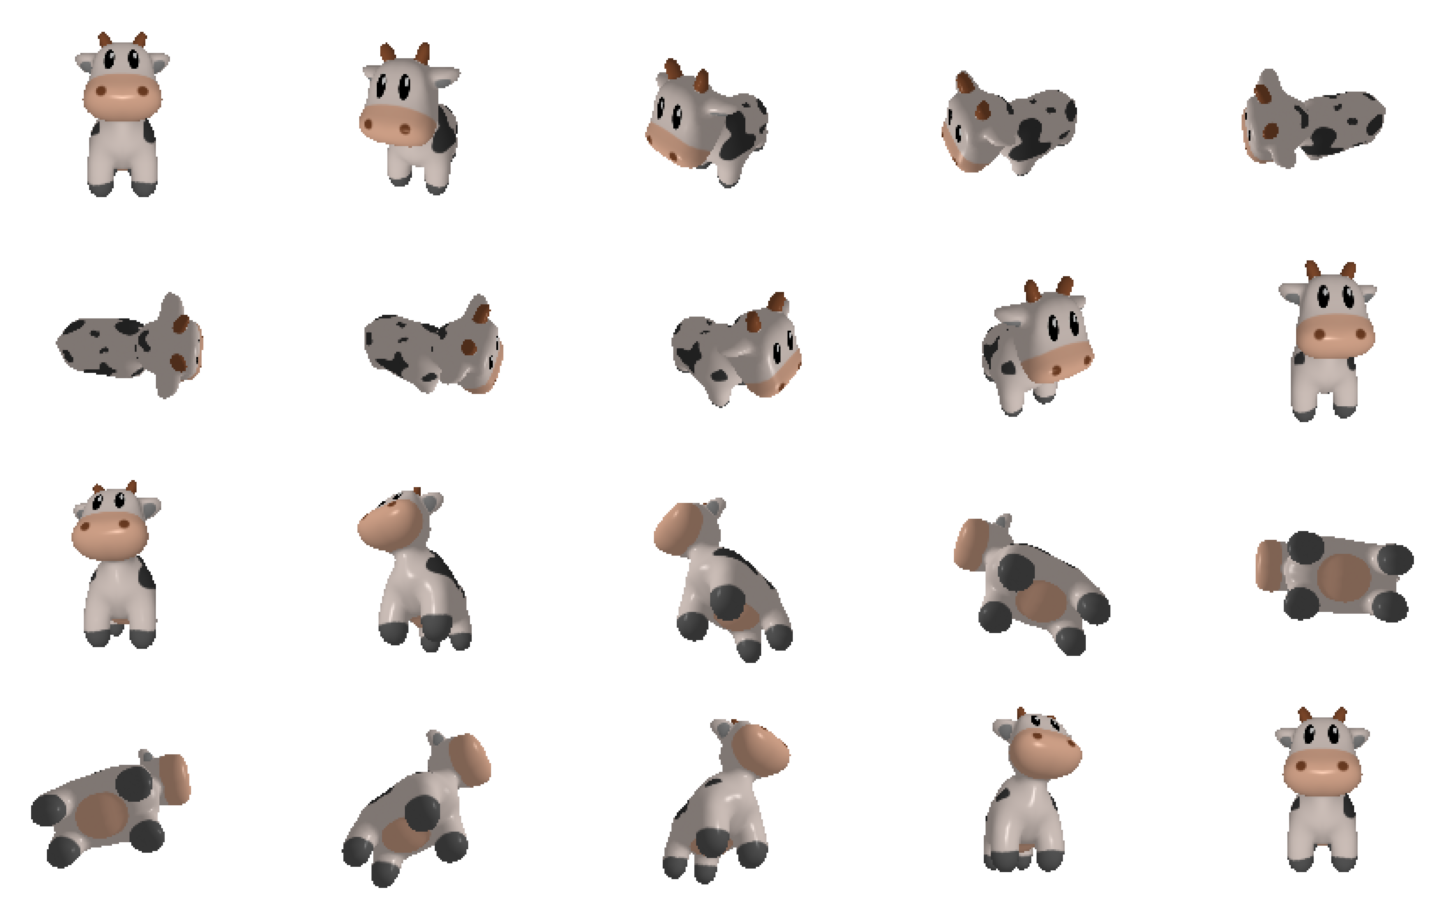

In [18]:
# RGB images
image_grid(target_images.cpu().numpy(), rows=4, cols=5, rgb=True)
plt.show()

In [19]:
import imageio

# Create a directory to store the individual frames
output_dir = "./output_frames"
os.makedirs(output_dir, exist_ok=True)

# Save each frame as an individual image file
for i, image in enumerate(target_images):
    image_path = os.path.join(output_dir, f"frame_{i:03d}.png")
    imageio.imwrite(image_path, (image.cpu().numpy() * 255).astype(np.uint8))
# Create the GIF from the saved frames
output_gif_path = "./dolphin_quay.gif"
image_paths = sorted(os.listdir(output_dir))
images = [imageio.imread(os.path.join(output_dir, image_path)) for image_path in image_paths]
imageio.mimsave(output_gif_path, images, duration=0.2)


<ipython-input-19-9a4e98d66d36>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(os.path.join(output_dir, image_path)) for image_path in image_paths]


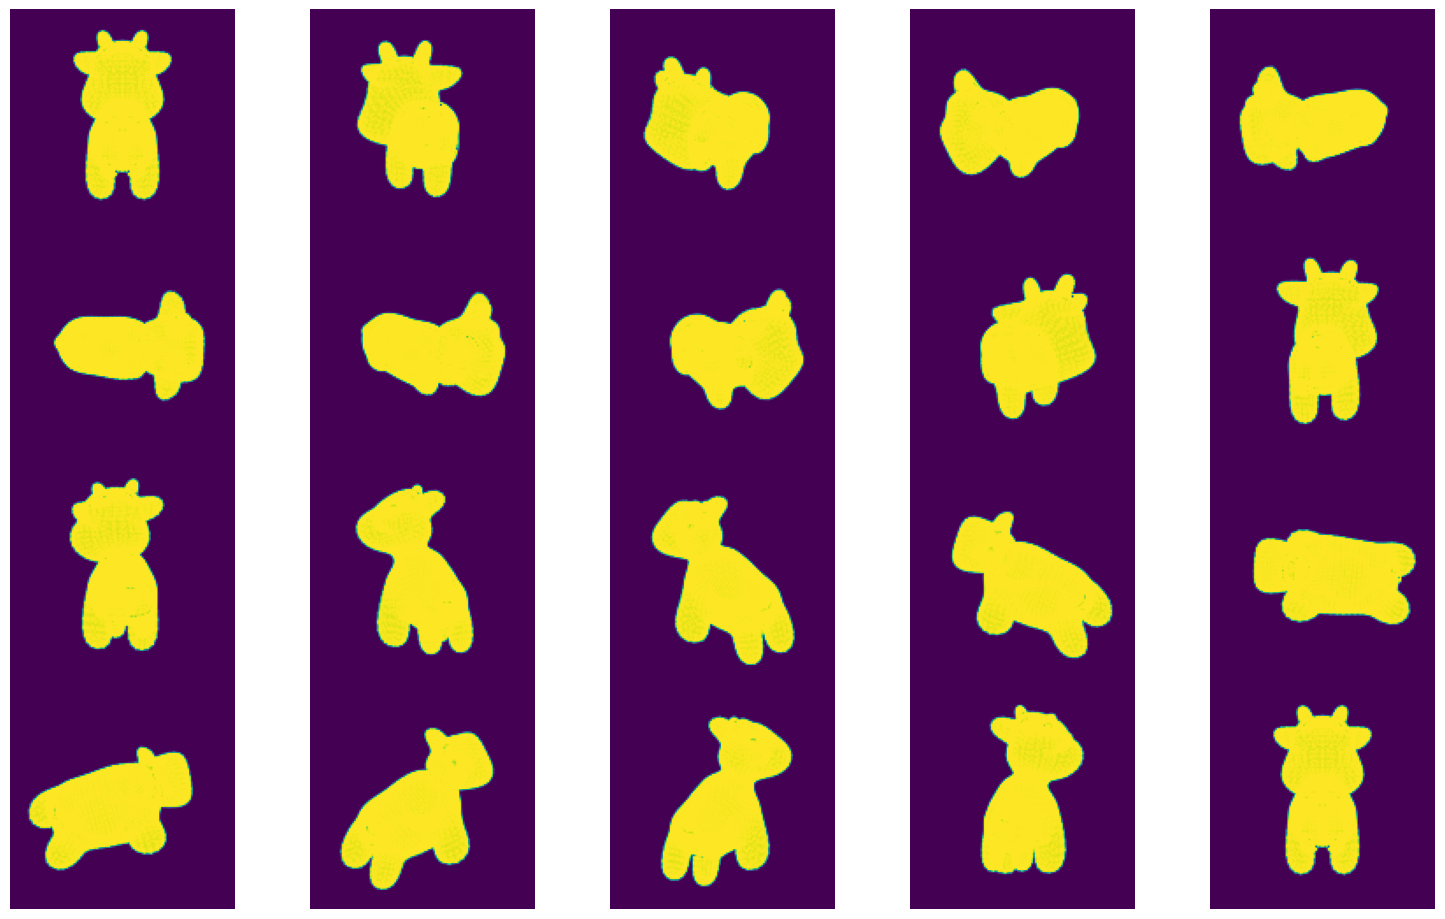

In [20]:
# Rasterization settings for silhouette rendering
sigma = 1e-4
raster_settings_silhouette = RasterizationSettings(
    image_size=128,
    blur_radius=np.log(1. / 1e-4 - 1.)*sigma,
    faces_per_pixel=50,
)

# Silhouette renderer
renderer_silhouette = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings_silhouette
    ),
    shader=SoftSilhouetteShader()
)

# Render silhouette images.  The 3rd channel of the rendering output is
# the alpha/silhouette channel
silhouette_images = renderer_silhouette(meshes, cameras=cameras, lights=lights)
target_silhouette = [silhouette_images[i, ..., 3] for i in range(num_views)]

# Visualize silhouette images
image_grid(silhouette_images.cpu().numpy(), rows=4, cols=5, rgb=False)
plt.show()

Đánh giá chất lượng
Các tùy chọn đo chất lượng lưới






In [ ]:
area
aspect_beta
aspect_frobenius
aspect_gamma
aspect_ratio
collapse_ratio
condition
diagonal
dimension
distortion
jacobian
max_angle
max_aspect_frobenius
max_edge_ratio
med_aspect_frobenius
min_angle
oddy
radius_ratio
relative_size_squared
scaled_jacobian
shape
shape_and_size
shear
shear_and_size
skew
stretch
taper
volume
warpage

In [ ]:
import pyvista
sphere = pyvista.Sphere(theta_resolution=20, phi_resolution=20)
cqual = sphere.compute_cell_quality('min_angle')
cqual.plot(show_edges=True)